<a href="https://colab.research.google.com/github/fvalderramab/AlgorithmsUN2023I/blob/main/Lab2/fvalderramab_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U fortran-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.7 MB/s eta 0:00:00


In [2]:
%reload_ext fortranmagic

/usr/local/lib/python3.8/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [3]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [4]:
assert ran_the_first_cell, "Oh noes!"

In [5]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [6]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [7]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [8]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [9]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [10]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [11]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [12]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [13]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [14]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [15]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [16]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [17]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [18]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [19]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]


In [20]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
 
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [21]:
%%time

matmul(a, b)

CPU times: user 93 µs, sys: 0 ns, total: 93 µs
Wall time: 138 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [22]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
 
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [23]:
%%time
matmul(a, b)

IndexError: ignored

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [73]:
def matmul(A, B):
    if len(A[0]) != len(B):
      print("Can't do this multiplication")
      return

    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [25]:
matmul(a, b)

Can't do this multiplication


**My own example 5 - Deifining A and B that are compatiible for multiplcation**

In [27]:
A=[[1,2,3,4],[5,6,7,8],[9,10,11,12]]
B=[[13,14],[15,16],[17,18],[19,20]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [28]:
matmul(A,B)

[[170, 180], [426, 452], [682, 724]]

In [71]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.8709019962964075, 0.07997357681898976, 0.6471743760811234],
 [0.6595318871792153, 0.8813297776916035, 0.1029015751735739]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [75]:
%%time
import time

randa = random_matrix(600,100)
randb = random_matrix(100,600)
start = time.time()
for i in range(10):
  randa = random_matrix(600,100)
  randb = random_matrix(100,600)
  matmul(randa,randb)

promedio = (time.time() - start)/10
promedio

CPU times: user 1min 53s, sys: 283 ms, total: 1min 53s
Wall time: 1min 54s


11.450410223007202

**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [173]:
import pandas as pd

df = pd.DataFrame()
df['Language'] = None
df['Average'] = None

df = df.append(pd.Series(['Python', promedio], index=df.columns), ignore_index=True)

print(df)

  Language   Average
0   Python  11.45041


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [77]:
%%time
import numpy as np

randa = random_matrix(600,100)
randb = random_matrix(100,600)
start = time.time()
for i in range(10):
  np.dot(randa,randb)

promedio1 = (time.time() - start)/10
promedio1

CPU times: user 264 ms, sys: 144 ms, total: 408 ms
Wall time: 235 ms


0.02175455093383789

In [78]:
df = df.append(pd.Series(['Numpy', promedio], index=df.columns), ignore_index=True)
print(df)

  Language   Average
0   Python  11.45041
1    Numpy  11.45041


In [79]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 11.4 s, sys: 27.5 ms, total: 11.5 s
Wall time: 11.6 s


In [80]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [81]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [82]:
list_data = [float(i) for i in range(1000000)]
array_data = np.array(list_data)

In [83]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 406 ms, sys: 2.96 ms, total: 409 ms
Wall time: 413 ms


3.3333283333312755e+17

In [84]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 2.02 ms, sys: 0 ns, total: 2.02 ms
Wall time: 2.04 ms


3.3333283333312755e+17

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [85]:
A=np.array([[1,2],[3,4]])
B=np.array([[5,6],[7,8]])

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [86]:
%%fortran

subroutine  matmul(A,B,N,L,M,NMAX,R)  
  implicit none
  integer,intent(in) :: N,L,M,NMAX   
  double precision, intent(in) :: A(NMAX,*)
  double precision, intent(in) :: B(NMAX,*)
  double precision, intent(out) :: R(N,M)
  integer I,J,K,aux
  do I=1,N  
    do J=1,M
      R(I,J)=0    
      do K=1,L
       R(I,J) = R(I,J) + A(I,K)*B(K,J)
        
      end do
    end do
  end do   
end 

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [87]:
rows_out = len(A)
cols_out = len(B[0])
N=rows_out
L=len(A[0])
M=cols_out
NMAX=2
matmul(A,B,N,L,M,NMAX)

array([[19., 22.],
       [43., 50.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [88]:
%%fortran

subroutine  matmul(A,B,N,L,M,R)  
  implicit none
  integer,intent(in) :: N,L,M   
  double precision, intent(in) :: A(600,*)
  double precision, intent(in) :: B(100,*)
  double precision, intent(out) :: R(N,M)
  integer I,J,K,aux
  do I=1,N  
    do J=1,M
      R(I,J)=0    
      do K=1,L
       R(I,J) = R(I,J) + A(I,K)*B(K,J)
        
      end do
    end do
  end do   
end 

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [89]:
A1 = np.array(random_matrix(600, 100))  
B1 = np.array(random_matrix(100, 600))

rows_out = len(A1)
cols_out = len(B1[0])
N=rows_out
L=len(A1[0])
M=cols_out
matmul(A1,B1,N,L,M)

array([[27.07751814, 26.91531062, 24.18275287, ..., 27.71178361,
        27.65904776, 26.6119492 ],
       [28.33080231, 27.58152294, 24.91993812, ..., 27.51722814,
        28.35099456, 27.45433333],
       [27.01337338, 27.33865721, 25.4895697 , ..., 28.47054107,
        27.59070756, 27.5557911 ],
       ...,
       [27.16798101, 27.08447064, 23.64387309, ..., 27.3644889 ,
        29.70069566, 26.31025831],
       [24.54571728, 25.13701256, 21.51454956, ..., 25.1191928 ,
        25.824069  , 23.23295786],
       [27.66676285, 25.35833547, 23.6687465 , ..., 27.3753998 ,
        26.71629667, 25.77253858]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [90]:
promedio2=[]
A2 = np.array(random_matrix(600, 100))  
B2 = np.array(random_matrix(100, 600))
for i in range(0,10):
  rows_out = len(A2)
  cols_out = len(B2[0])
  N=rows_out
  L=len(A2[0])
  M=cols_out 

  start = time.perf_counter()
  matmul(A2,B2,N,L,M)
  end = time.perf_counter()

  promedio2.append(end- start)
 
promedio2=np.array(promedio2).mean()
print(promedio2)
df=pd.DataFrame([promedio,promedio1,promedio2],index=['Python','Numpy','Fortran Magic'],columns=['Promedio(s)'])
df

0.04250675069993122


,Promedio(s)
Python,11.450410
Numpy,0.021755
Fortran Magic,0.042507


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [91]:
%%writefile prodMatriz.f

subroutine  matmul10()  
  implicit none
  integer,parameter :: N=600
	integer,parameter :: L=100
	integer,parameter :: M=600  
  double precision :: A(N,L)
  double precision :: B(L,M)
  double precision :: R(N,M)
  integer I,J,K,auxL,auxN,auxM,conteo
  do auxN=1,N
      do auxL=1,L
        A(auxN,auxL)=6
      end do
    end do
    
    do auxL=1,L
      do auxM=1,M
        B(auxL,auxM)=2
      end do

    end do
  do conteo=1,10 
    
    do I=1,N  
      do J=1,M
        R(I,J)=0    
        do K=1,L
        R(I,J) = R(I,J) + A(I,K)*B(K,J)
          
        end do
      end do
    end do 
  end do
  return  
end 

Overwriting prodMatriz.f


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [92]:
start = time.perf_counter()
!gfortran prodMatriz.f -o && ./a.out
end = time.perf_counter()
promedio3=[end- start]
 
promedio3=np.array(promedio3).mean()/10
print(promedio3)

gfortran: error: missing filename after ‘-o’
0.012914120300001742


**My own example 18 - Adding Fortran average execution time to the data frame**

In [93]:
df=pd.DataFrame([promedio,promedio1,promedio2,promedio3],index=['Python','Numpy','Fortran Magic','Frotran'],columns=['Promedio(s)'])
df

,Promedio(s)
Python,11.450410
Numpy,0.021755
Fortran Magic,0.042507
Frotran,0.012914


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [94]:
%%writefile multMatriz.c
#include<stdio.h>
#include<stdlib.h>
#include<time.h>

int main()
{
  int i,j,matrizA[600][100];
        srand(time(0));
        for (i = 0; i < 600; i++){
            for (j = 0; j < 100; j++){
                matrizA[i][j] = rand() % 10 +1 ;          
            }
        }
        int k,l,matrizB[100][600];
        srand(time(0));
        for (k = 0; k < 100; k++){
            for (l = 0; l < 600; l++){
                matrizB[k][l] = rand() % 10 +1 ;
            }
        }
    for (int a = 0; a < 10; a++) {      
        int producto[600][600];
        for (int a = 0; a < 600; a++) {
            // Dentro recorremos las filas de la primera (A)
            for (int i = 0; i < 600; i++) {
                int suma = 0;
                // Y cada columna de la primera (A)
                for (int j = 0; j < 100; j++) {
                    // Multiplicamos y sumamos resultado
                    suma += matrizA[i][j] * matrizB[j][a];
                }
                // Lo acomodamos dentro del producto
                producto[i][a] = suma;
            }
        }     
    }
    return 0;
}

Overwriting multMatriz.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [95]:
start = time.perf_counter()
!gcc multMatriz.c && ./a.out
end = time.perf_counter()
promedio4=[end- start]
 
promedio4=np.array(promedio4).mean()/10
print(promedio4)

0.1735357955999916


**My own example 21 - Adding c average execution time to the data frame**

In [96]:
df=pd.DataFrame([promedio,promedio1,promedio2,promedio3,promedio4],index=['Python','Numpy','Fortran Magic','Frotran','C'],columns=['Promedio(s)'])
df

,Promedio(s)
Python,11.450410
Numpy,0.021755
Fortran Magic,0.042507
Frotran,0.012914
C,0.173536


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [97]:
%%writefile multMatriz.cpp
#include<stdio.h>
#include<stdlib.h>
#include<time.h>

int main()
{
  int i,j,matrizA[600][100];
        srand(time(0));
        for (i = 0; i < 600; i++){
            for (j = 0; j < 100; j++){
                matrizA[i][j] = rand() % 10 +1 ;         
            }
        }
        int k,l,matrizB[100][600];
        srand(time(0));
        for (k = 0; k < 100; k++){
            for (l = 0; l < 600; l++){
                matrizB[k][l] = rand() % 10 +1 ;
            }
        }
    for (int a = 0; a < 10; a++) {  
        int producto[600][600];
        for (int a = 0; a < 600; a++) {
            // Dentro recorremos las filas de la primera (A)
            for (int i = 0; i < 600; i++) {
                int suma = 0;
                // Y cada columna de la primera (A)
                for (int j = 0; j < 100; j++) {
                    // Multiplicamos y sumamos resultado
                    suma += matrizA[i][j] * matrizB[j][a];
                }
                // Lo acomodamos dentro del producto
                producto[i][a] = suma;
            }
        }

        // Recorrer producto
      /** printf("Imprimiendo producto\n");
        for (int i = 0; i < 600; i++) {
            for (int j = 0; j < 600; j++) {
                printf("%d ", producto[i][j]);
            }
            printf("\n");
        }**/
    }
    return 0;

}

Writing multMatriz.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [99]:
start = time.perf_counter()
!g++ multMatriz.cpp && ./a.out
end = time.perf_counter()
promedio5=[end- start]
 
promedio5=np.array(promedio5).mean()/10
print(promedio5)

0.1330908394999824


**My own example 24 - Adding C++ average execution time to the data frame**

In [100]:
df=pd.DataFrame([promedio,promedio1,promedio2,promedio3,promedio4,promedio5],index=['Python','Numpy','Fortran Magic','Frotran','C','C++'],columns=['Promedio(s)'])
df

,Promedio(s)
Python,11.450410
Numpy,0.021755
Fortran Magic,0.042507
Frotran,0.012914
C,0.173536
C++,0.133091


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [101]:
%%writefile Main.java
import java.util.*;

class NewClass {
    public static int[][] multiply(int[][] a, int[][] b) {
    int[][] c = new int[a.length][b[0].length];
    // se comprueba si las matrices se pueden multiplicar
    if (a[0].length == b.length) {
        for (int i = 0; i < a.length; i++) {
            for (int j = 0; j < b[0].length; j++) {
                for (int k = 0; k < a[0].length; k++) {
                    // aquí se multiplica la matriz
                    c[i][j] += a[i][k] * b[k][j];
                }
            }
        }
    }
    /**
     * si no se cumple la condición se retorna una matriz vacía
     */
    return c;
}
  public static void main(String[] args) {
    int matrizA[][] = new int[600][100];
        int matrizB[][] = new int[100][600];
        for (int x=0; x < matrizA.length; x++) {
            for (int y=0; y < matrizA[x].length; y++) {
                matrizA[x][y] = (int) (Math.random()*10+1);
      }
    }
        for (int x=0; x < matrizB.length; x++) {
            for (int y=0; y < matrizB[x].length; y++) {
                matrizB[x][y] = (int) (Math.random()*10+1);
      }
    }
    for (int u=0; u < 10; u++) {
        int[][] c = multiply(matrizA, matrizB);
        //System.out.println(Arrays.deepToString(c));
    }
  }
}

Writing Main.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [103]:
start = time.perf_counter()
!javac Main.java
end = time.perf_counter()
promedio6=[end- start]
 
promedio6=np.array(promedio6).mean()/10
print(promedio6)

0.10458670560001337


**My own example 27 - Adding Java average execution time to the data frame**

In [104]:
df=pd.DataFrame([promedio,promedio1,promedio2,promedio3,promedio4,promedio5,promedio6],index=['Python','Numpy','Fortran Magic','Frotran','C','C++','Java'],columns=['Promedio(s)'])
df

,Promedio(s)
Python,11.450410
Numpy,0.021755
Fortran Magic,0.042507
Frotran,0.012914
C,0.173536
C++,0.133091
Java,0.104587


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [105]:
%%writefile prodMatreces.js

function multiply(a, b) {
  var   m = new Array(600);  // initialize array of rows
  for (var r = 0; r < 600; ++r) {
    m[r] = new Array(100); // initialize the current row
    for (var c = 0; c < 600; ++c) {
      m[r][c] = 0;             // initialize the current cell
      for (var i = 0; i < 100; ++i) {
        m[r][c] += parseInt(a[r][i]) +parseInt(b[i][c]);
      }
    }
  }
  return m;
}

function btn_multidimensional_A(){
  var A = new Array(600);
  // Random integer between 0 and 10
  var position = Math.floor(Math.random() * (10 - 0 + 1)) + 0;

  for(index=0; index<600; index++) {
    A[index] = new Array(100);
  }

  // Write data in mutlidimensional array
  for (i=0; i<600; i++){
    for (j=0; j<100; j++){
      A[i][j]= position;
      position++;
    }
  }
  return A;
}

function btn_multidimensional_B(){
 var B = new Array(100);
  // Random integer between 0 and 10
  var position = Math.floor(Math.random() * (10 - 0 + 1)) + 0;
  
  for(index=0; index<100; index++) {
    B[index] = new Array(600);
  }
  // Write data in mutlidimensional array
  for (i=0; i<100; i++){
    for (j=0; j<600; j++){
      B[i][j]= position;
      position++;
    }
  }
  return B;
}
for (i=0; i<10; i++){
  multiply(btn_multidimensional_A(), btn_multidimensional_B());
}

Writing prodMatreces.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [108]:
start = time.perf_counter()
!node prodMatreces.js
end = time.perf_counter()
promedio7=[end- start]
 
promedio7=np.array(promedio7).mean()/10
print(promedio7)

0.07307114719997117


**My own example 30 - Adding Javascript average execution time to the data frame**

In [110]:
df=pd.DataFrame([promedio,promedio1,promedio2,promedio3,promedio4,promedio5,promedio6,promedio7],index=['Python','Numpy','Fortran Magic','Frotran','C','C++','Java','Javascript'],columns=['Promedio(s)'])
df

,Promedio(s)
Python,11.450410
Numpy,0.021755
Fortran Magic,0.042507
Frotran,0.012914
C,0.173536
C++,0.133091
Java,0.104587
Javascript,0.073071


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [111]:
minimo=df['Promedio(s)'].min()
minimo

0.012914120300001742

**My own example 32 - Adding the Speed factor columne to the data frame**

In [113]:
factor=np.round(df['Promedio(s)']/minimo, decimals = 0) 
df['Factor']=factor
df

,Promedio(s),Factor
Python,11.450410,887.0
Numpy,0.021755,2.0
Fortran Magic,0.042507,3.0
Frotran,0.012914,1.0
C,0.173536,13.0
C++,0.133091,10.0
Java,0.104587,8.0
Javascript,0.073071,6.0


**My own example 33 - Sorting the the data frame by average execution time**

In [114]:
df=df.sort_values('Promedio(s)')
df

,Promedio(s),Factor
Frotran,0.012914,1.0
Numpy,0.021755,2.0
Fortran Magic,0.042507,3.0
Javascript,0.073071,6.0
Java,0.104587,8.0
C++,0.133091,10.0
C,0.173536,13.0
Python,11.450410,887.0


## Why is the Python Version so Much Slower?

In [115]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [116]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [117]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [118]:
data + data

array([2, 4, 6, 8])

In [119]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 3.72 ms, sys: 3.99 ms, total: 7.71 ms
Wall time: 8.44 ms


3.333328333335e+17

In [120]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 3.01 ms, sys: 17 µs, total: 3.03 ms
Wall time: 6.52 ms


3.333328333334115e+17

In [121]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 1.88 ms, sys: 0 ns, total: 1.88 ms
Wall time: 1.89 ms


3.3333283333312755e+17

In [122]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [123]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [124]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [125]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [126]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [127]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [128]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [129]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [130]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [131]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [132]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [133]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [134]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [135]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [136]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [137]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [138]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [139]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [140]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [141]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [142]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [143]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [144]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [145]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [146]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [147]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [148]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [149]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [150]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [151]:
variance(np.random.standard_normal(1000))

0.960553142942569

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [152]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [153]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [154]:
data.mean()

14.5

In [155]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [156]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [157]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [158]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [159]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [160]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [161]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [162]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [163]:
# ... or by label.
s.loc['a']

1

In [164]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [165]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [166]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [167]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [168]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [169]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [170]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

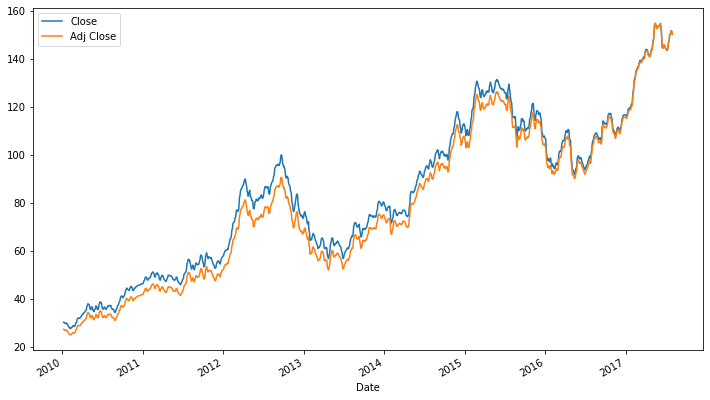

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

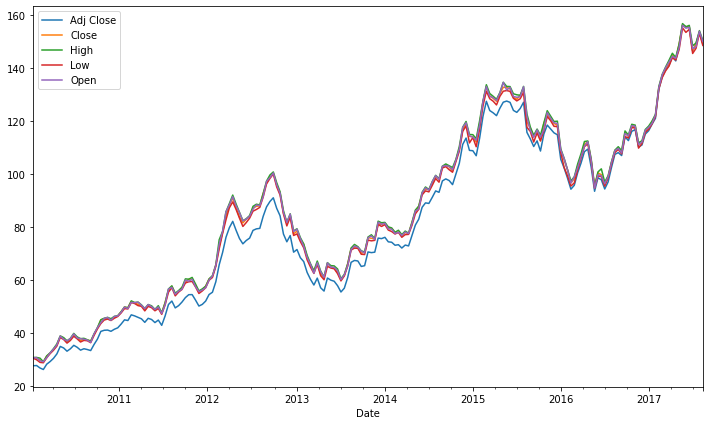

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

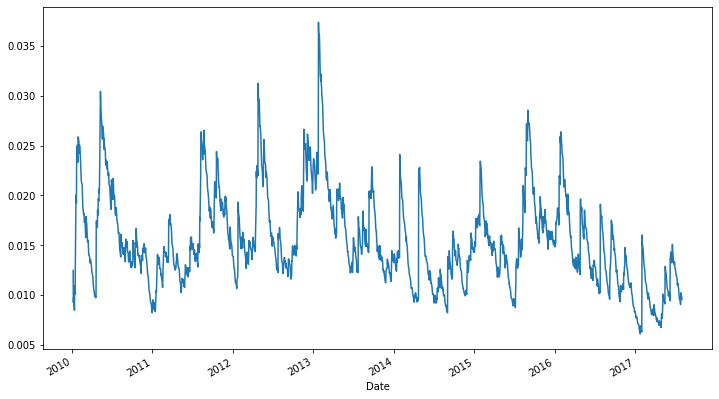

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [180]:
## Run this cell to test it
!git clone https://github.com/ssanderson/pydata-toolbox

Cloning into 'pydata-toolbox'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 88 (delta 22), reused 14 (delta 8), pack-reused 52
Unpacking objects: 100% (88/88), 11.87 MiB | 5.33 MiB/s, done.


In [181]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [182]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [183]:
#from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

<ipython-input-181-fcd4f87ca426>:56: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [184]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

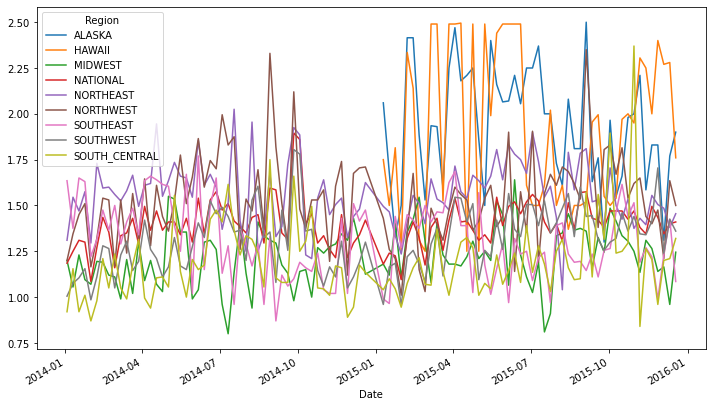

In [185]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [186]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

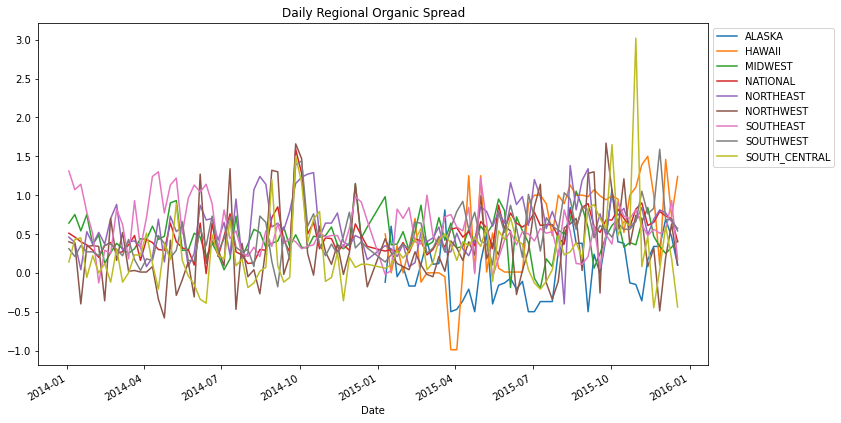

In [187]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [188]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


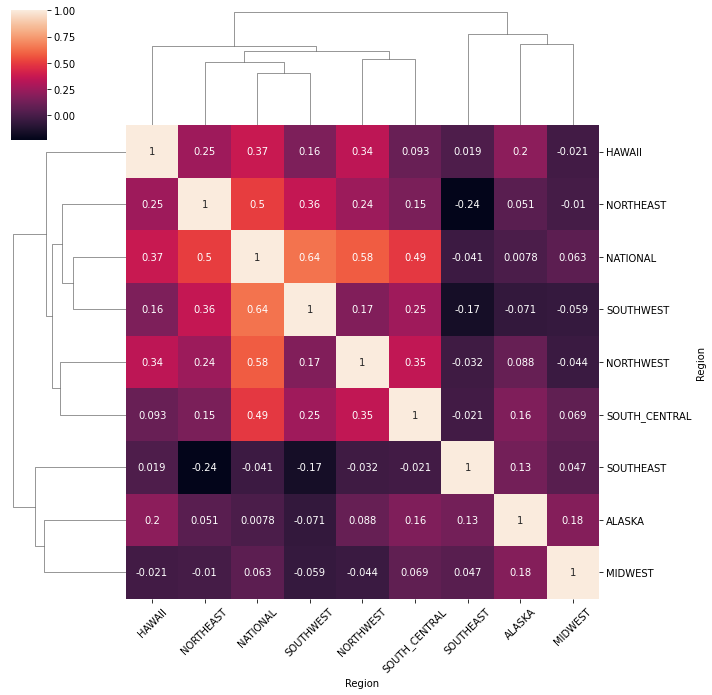

In [189]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# "Real world" data:  Sistema de Información de Eventos de Violencia del Conflicto Armado SIEVCAC - Casos RU Reclutamiento y Utilización de Niños, Niñas y Adolescentes

Usando la base de datos open source [base](https://www.datos.gov.co/Inclusi-n-Social-y-Reconciliaci-n/Sistema-de-Informaci-n-de-Eventos-de-Violencia-del/hzd2-7ea7) ofrecido por el Observatorio de Memoria y Conflicto (OMC), vamos a hacer un análisis sobre el reclutamiento forzado de niños, niñas y adolescentes durante el conflicto armado. Veremos el número histórico de víctimas, los tipos y formas de reclutamiento, y el total de casos en los que estuvieron involucrados los presuntos responsables. En este caso se importan los datos de las primeras 5 filas.

In [201]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

recruitment = pd.read_csv('/content/Sistema_de_Informaci_n_de_Eventos_de_Violencia_del_Conflicto_Armado_SIEVCAC_-_Casos_RU_Reclutamiento_y_Utilizaci_n_de_Ni_os__Ni_as_y_Adolescentes.csv')
recruitment.head()

,ID Caso,ID Caso Relacionado,Año,Mes,Día,Código DANE de Municipio,Municipio,Departamento,Región,Modalidad,...,Extorsión,Lesionados Civiles,Pillaje,Tortura,Violencia Basada en Género,Otro Hecho Simultáneo,Total de Víctimas del Caso,Forma de Vinculación,Tipo de Vinculación,latitud-longitud
0,207556,NaN,2001,4,25,5756,SONSON,ANTIOQUIA,ORIENTE ANTIOQUEÑO,PERSUASIÓN,...,0,0,0,0,NaN,NaN,1,INDIVIDUAL,RECLUTAMIENTO,POINT (-74.8280732592 5.8376814743)
1,209268,NaN,0,0,0,5234,DABEIBA,ANTIOQUIA,OCCIDENTE ANTIOQUEÑO,DESCONOCIDA,...,0,0,0,0,NaN,NaN,1,INDIVIDUAL,RECLUTAMIENTO,POINT (-76.2629766474 7.0003219398)
2,225057,NaN,1988,0,0,68689,SAN VICENTE DE CHUCURI,SANTANDER,MAGDALENA MEDIO,COACCIÓN,...,0,0,0,0,NaN,NaN,1,INDIVIDUAL,RECLUTAMIENTO,POINT (-73.4110239344 6.8803829351)
3,228661,NaN,1998,2,15,66456,MISTRATO,RISARALDA,EJE CAFETERO,PERSUASIÓN,...,0,0,0,0,NaN,OCULTAMIENTO DE CADÁVER,1,INDIVIDUAL,RECLUTAMIENTO,POINT (-75.9043263373 5.4162684868)
4,229622,NaN,1993,1,11,50001,VILLAVICENCIO,META,PIEDEMONTE LLANERO,ENGAÑO,...,0,0,0,0,NaN,NaN,1,INDIVIDUAL,RECLUTAMIENTO,POINT (-73.6270920374 4.1238614996)


Información sobre los tipos de datos, valores nulos y número de columna a continuación

In [ ]:
print("Tamaño data frame: Filas:", recruitment.shape[0], " Columnas: ", recruitment.shape[1])
print(recruitment.info())

Tamaño data frame: Filas: 16988  Columnas:  27
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16988 entries, 0 to 16987
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   ID Caso                                     16988 non-null  int64 
 1   ID Caso Relacionado                         351 non-null    object
 2   Año                                         16988 non-null  int64 
 3   Mes                                         16988 non-null  int64 
 4   Día                                         16988 non-null  int64 
 5   Código DANE de Municipio                    16988 non-null  int64 
 6   Municipio                                   16988 non-null  object
 7   Departamento                                16988 non-null  object
 8   Región                                      16960 non-null  object
 9   Modalidad                                   169

Ahora, podemos ver las variables objetivo para graficar una serie temporal con los hechos, por tipología y ubicación temporal. Para eso vamos a unir las columnas Año, Mes y Día, y convertirlo en un objeto de fecha y hora. Además, dejaremos las columnas que no nos sirven: ID Caso Relacionado y Código DANE de Municipio.


In [ ]:
recruitment['Fecha'] = pd.to_datetime(recruitment['Año'].astype('str') + '-' 
                                      +  recruitment['Mes'].astype('str') + '-' 
                                      + recruitment['Día'].astype('str'), 
                                      errors='coerce', format="%Y/%m/%d",
                                      exact=False)
recruitment_cl = recruitment.drop(['Año', 'Mes', 'Día', 'ID Caso Relacionado', 'Código DANE de Municipio'], axis=1)

In [ ]:
recruitment_cl.columns

Index(['ID Caso', 'Municipio', 'Departamento', 'Región', 'Modalidad',
       'Presunto Responsable', 'Descripción Presunto Responsable',
       'Abandono o Despojo Forzado de Tierras', 'Amenaza o Intimidación',
       'Ataque Contra Misión Médica',
       'Confinamiento o Restricción a la Movilidad', 'Desplazamiento Forzado',
       'Extorsión', 'Lesionados Civiles', 'Pillaje', 'Tortura',
       'Violencia Basada en Género', 'Otro Hecho Simultáneo',
       'Total de Víctimas del Caso', 'Forma de Vinculación',
       'Tipo de Vinculación', 'latitud-longitud', 'Fecha'],
      dtype='object')

In [ ]:
recruitment_cl['Total de Víctimas del Caso'].describe()

count    16988.000000
mean         1.056805
std          1.249340
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        150.000000
Name: Total de Víctimas del Caso, dtype: float64

<Figure size 864x864 with 0 Axes>

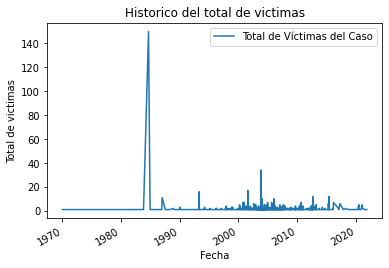

In [ ]:
plt.figure(figsize=(12, 12));
recruitment_cl.plot.line(x='Fecha', y='Total de Víctimas del Caso')
plt.xlabel('Fecha')
plt.ylabel('Total de victimas')
plt.title('Historico del total de victimas')
plt.show()

De la información anterior podemos ver que la media es de 1,05 por día, y todos los cuartiles reflejan los datos agrupados alrededor de 1. Además, tenemos un número máximo de víctimas de 150 en un día.
También podemos analizar el número de víctimas por las variables 'Tipo de conexión' y 'Forma de conexión', que son los fines para los que fueron utilizados los menores y la forma en que fueron captados. Hacemos una depuración porque muchos de los actores y métodos no están informados, por lo que presentamos solo los que están registrados y así tener una comparación más clara. Podemos ver los valores enseguida.

In [ ]:
recruitment['Tipo de Vinculación'].value_counts()

SIN INFORMACIÓN                                                      13706
RECLUTAMIENTO                                                         2869
UTILIZACIÓN                                                            391
UTILIZACIÓN EN ACTIVIDADES MILITARES O INTELIGENCIA                     13
UTILIZACIÓN EN ACTIVIDADES DOMÉSTICAS, DE TRANSPORTE O MENSAJERÍA        9
Name: Tipo de Vinculación, dtype: int64

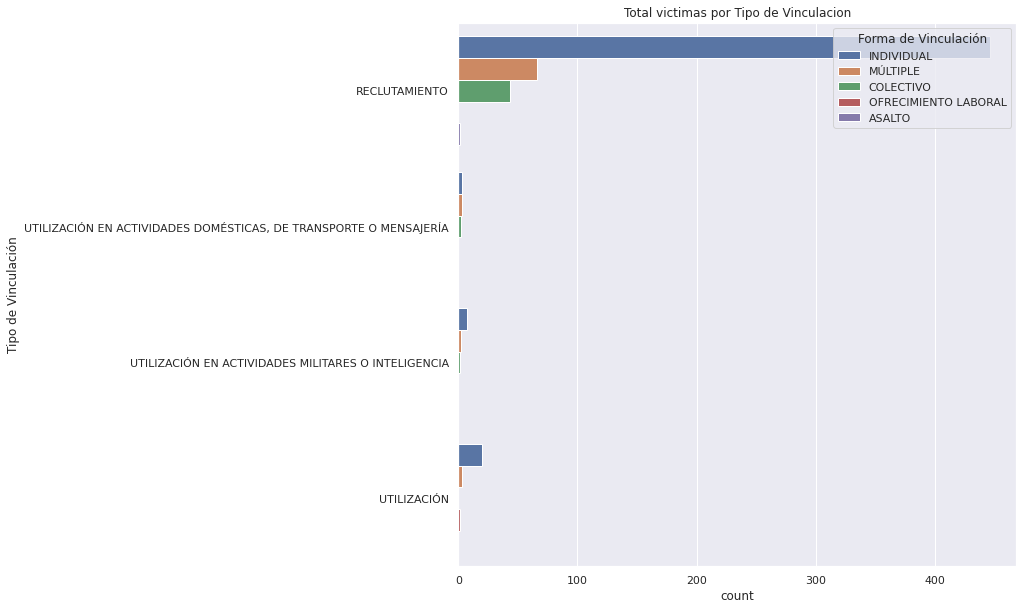

In [ ]:
recruitment_informed = recruitment[recruitment['Forma de Vinculación'] != 'SIN INFORMACIÓN']
recruitment_informed = recruitment_informed[recruitment_informed['Tipo de Vinculación'] != 'SIN INFORMACIÓN']
plt.figure(figsize=(10, 10))
sns.countplot(data=recruitment_informed, 
                y='Tipo de Vinculación', 
             hue='Forma de Vinculación')
plt.title('Total victimas por Tipo de Vinculacion')
plt.show()

Podemos observar que el tipo de vinculación más común es el reclutamiento, en el que la mejor forma de hacerlo fue el individual, seguido del reclutamiento múltiple. También se registran algunos casos de uso con fines domésticos, militares o de inteligencia. También se pueden presentar victimas totales por presuntos responsables:

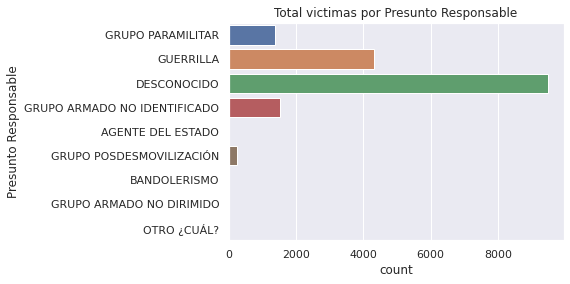

In [ ]:
sns.set_theme()
sns.countplot(data=recruitment_no_outl, y='Presunto Responsable')
plt.title('Total victimas por Presunto Responsable')
plt.show()

Finalmente, se puede realizar una matriz de correlación del tipo de acto violento, junto con las variables que tienen una posible relación, como modalidad, responsable, tipo y forma de vinculación; podemos estudiar si existe alguna correlación entre las variables.

In [ ]:
correlations = recruitment_cl[['Modalidad',
       'Presunto Responsable',
       'Abandono o Despojo Forzado de Tierras', 'Amenaza o Intimidación',
       'Confinamiento o Restricción a la Movilidad', 'Desplazamiento Forzado',
       'Extorsión', 'Lesionados Civiles', 'Pillaje', 'Tortura',
       'Violencia Basada en Género', 'Otro Hecho Simultáneo',
       'Total de Víctimas del Caso', 'Forma de Vinculación',
       'Tipo de Vinculación']].corr()
correlations

,Abandono o Despojo Forzado de Tierras,Amenaza o Intimidación,Confinamiento o Restricción a la Movilidad,Desplazamiento Forzado,Extorsión,Lesionados Civiles,Pillaje,Tortura,Total de Víctimas del Caso
Abandono o Despojo Forzado de Tierras,1.000000,0.153564,-0.000726,0.381478,-0.000679,-0.000574,0.044512,0.187310,-0.001521
Amenaza o Intimidación,0.153564,1.000000,0.132141,0.524690,0.170283,0.100209,0.042696,0.151037,0.020560
Confinamiento o Restricción a la Movilidad,-0.000726,0.132141,1.000000,0.146276,0.133249,0.157802,0.069230,0.222359,0.001185
Desplazamiento Forzado,0.381478,0.524690,0.146276,1.000000,0.156585,0.045493,0.039595,0.163104,0.010769
Extorsión,-0.000679,0.170283,0.133249,0.156585,1.000000,-0.000348,-0.000445,-0.000432,0.001398
Lesionados Civiles,-0.000574,0.100209,0.157802,0.045493,-0.000348,1.000000,0.043706,0.281458,0.004714
Pillaje,0.044512,0.042696,0.069230,0.039595,-0.000445,0.043706,1.000000,0.129941,0.009898
Tortura,0.187310,0.151037,0.222359,0.163104,-0.000432,0.281458,0.129941,1.000000,0.000194
Total de Víctimas del Caso,-0.001521,0.020560,0.001185,0.010769,0.001398,0.004714,0.009898,0.000194,1.000000


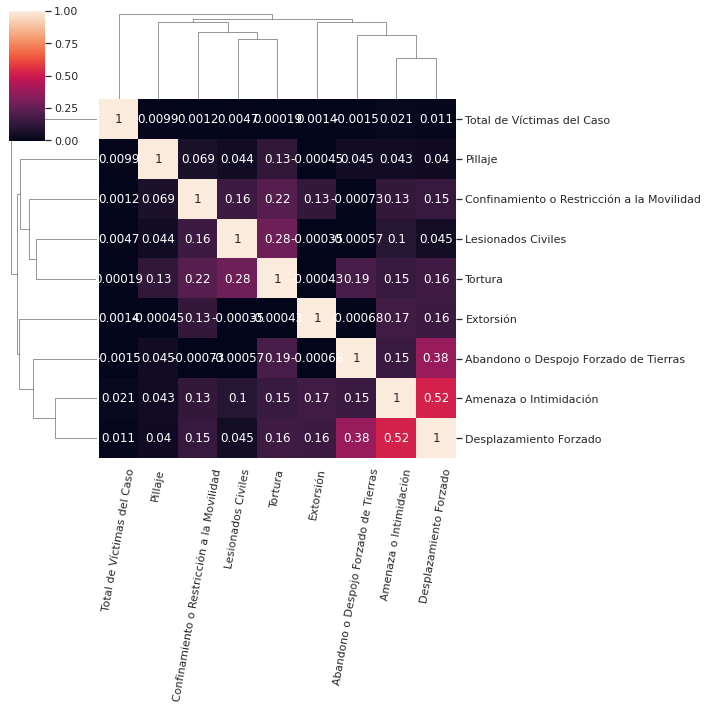

In [ ]:
grid = sns.clustermap(correlations, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);

From the graph above, the only strong positive relationship shown is between forced displacement with threat and intimidation. The other variables show correlations close to 0, so there seems to be none.

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!